In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [367]:
conversor = lambda x: pd.datetime.strptime(x, '%d/%m/%Y')# Converson de fechas
datos = pd.read_csv("drive/My Drive/Colab Notebooks/descarga.csv", parse_dates=["dateRep"], date_parser=conversor, sep=",")
print(datos.columns)
print(datos.head(10))

Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2018', 'continentExp'],
      dtype='object')
     dateRep  day  month  ...  countryterritoryCode  popData2018  continentExp
0 2020-04-22   22      4  ...                   AFG   37172386.0          Asia
1 2020-04-21   21      4  ...                   AFG   37172386.0          Asia
2 2020-04-20   20      4  ...                   AFG   37172386.0          Asia
3 2020-04-19   19      4  ...                   AFG   37172386.0          Asia
4 2020-04-18   18      4  ...                   AFG   37172386.0          Asia
5 2020-04-17   17      4  ...                   AFG   37172386.0          Asia
6 2020-04-16   16      4  ...                   AFG   37172386.0          Asia
7 2020-04-15   15      4  ...                   AFG   37172386.0          Asia
8 2020-04-14   14      4  ...                   AFG   37172386.0          Asia
9 2020-04-13   13    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  """Entry point for launching an IPython kernel.


In [368]:
# Filtros
countryXdeaths = datos[["countriesAndTerritories", "deaths"]]
dayXdeaths = datos[["dateRep", "deaths"]]
dataCol = datos[datos["countriesAndTerritories"] == "Colombia"]
ColXdeaths = dataCol[["dateRep", "deaths"]]
ColXcases = dataCol[["dateRep", "cases"]]
print(ColXdeaths.head(10))

# print(countryXdeath)

        dateRep  deaths
2536 2020-04-22       7
2537 2020-04-21      10
2538 2020-04-20      13
2539 2020-04-19      13
2540 2020-04-18       9
2541 2020-04-17      13
2542 2020-04-16       4
2543 2020-04-15      15
2544 2020-04-14       3
2545 2020-04-13       9


In [0]:
# Grupos
countryXdeaths = countryXdeaths.groupby(["countriesAndTerritories"])["deaths"].sum()
dayXdeaths = dayXdeaths.groupby(["dateRep"])["deaths"].sum()
ColXdeaths = ColXdeaths.groupby(["dateRep"])["deaths"].sum()
ColXcases = ColXcases.groupby(["dateRep"])["cases"].sum()
# print(countryXdeath)

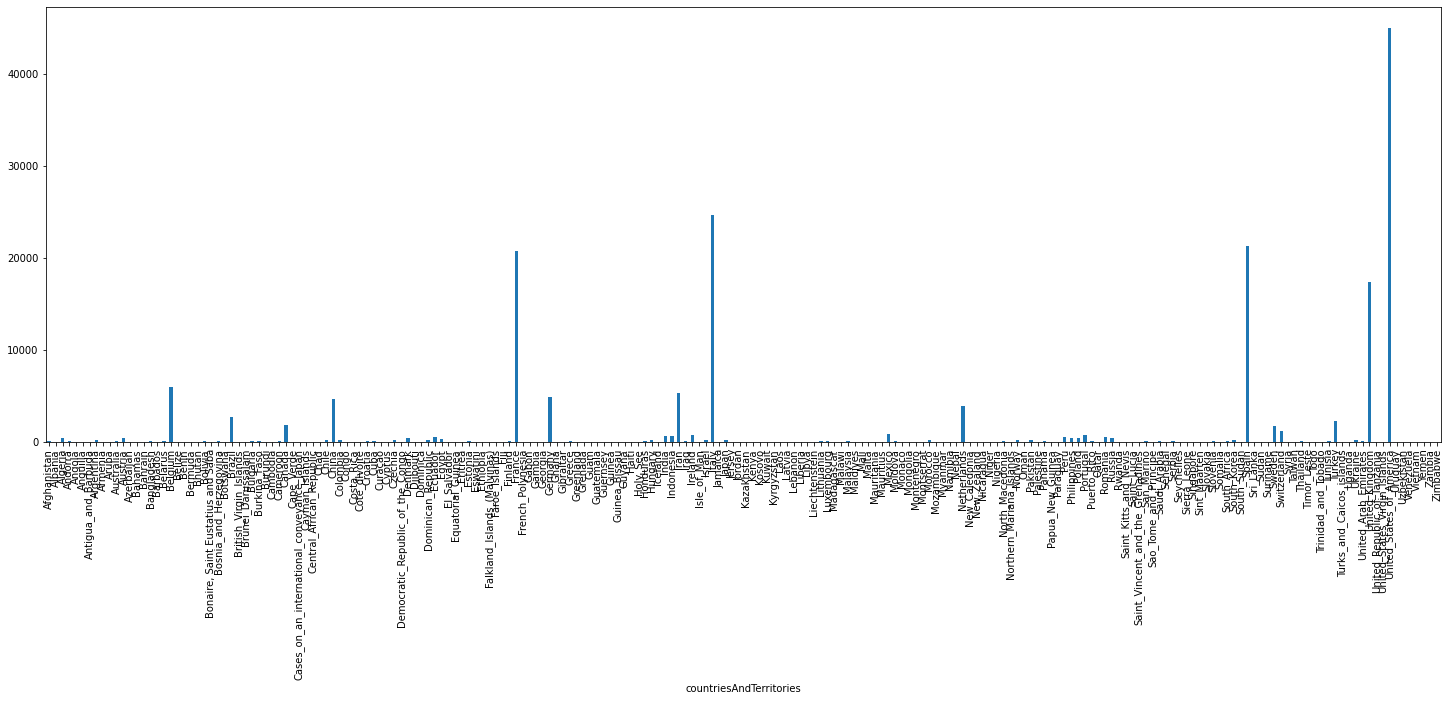

In [370]:
# Graficas
plt.figure(figsize=(25, 8))
countryXdeaths.plot.bar()

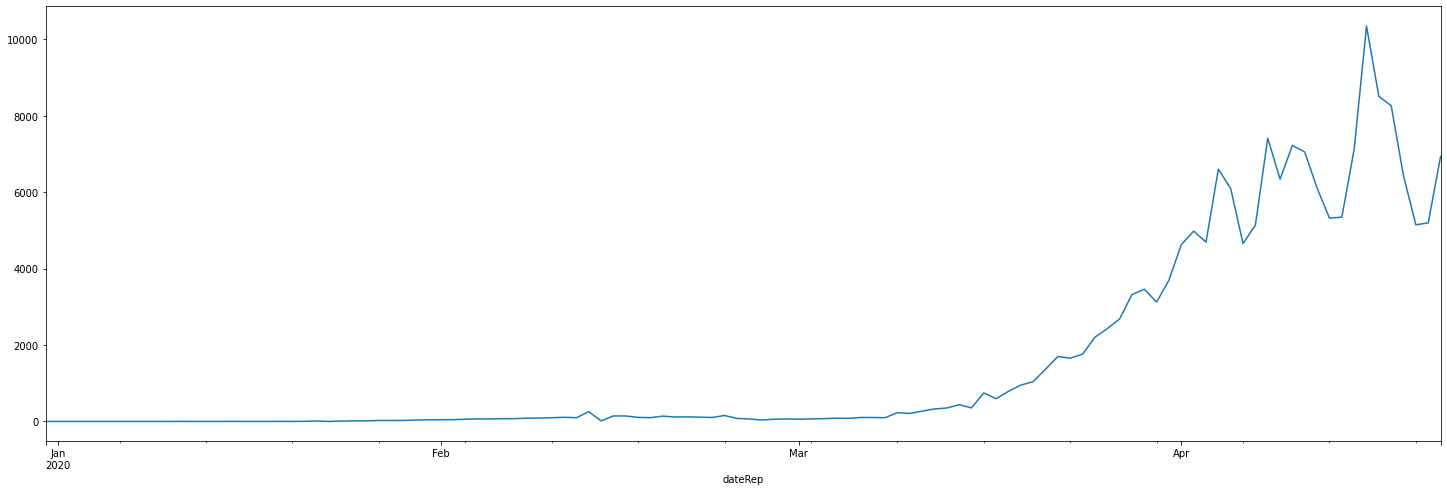

In [371]:
plt.figure(figsize=(25, 8))
dayXdeaths.plot()

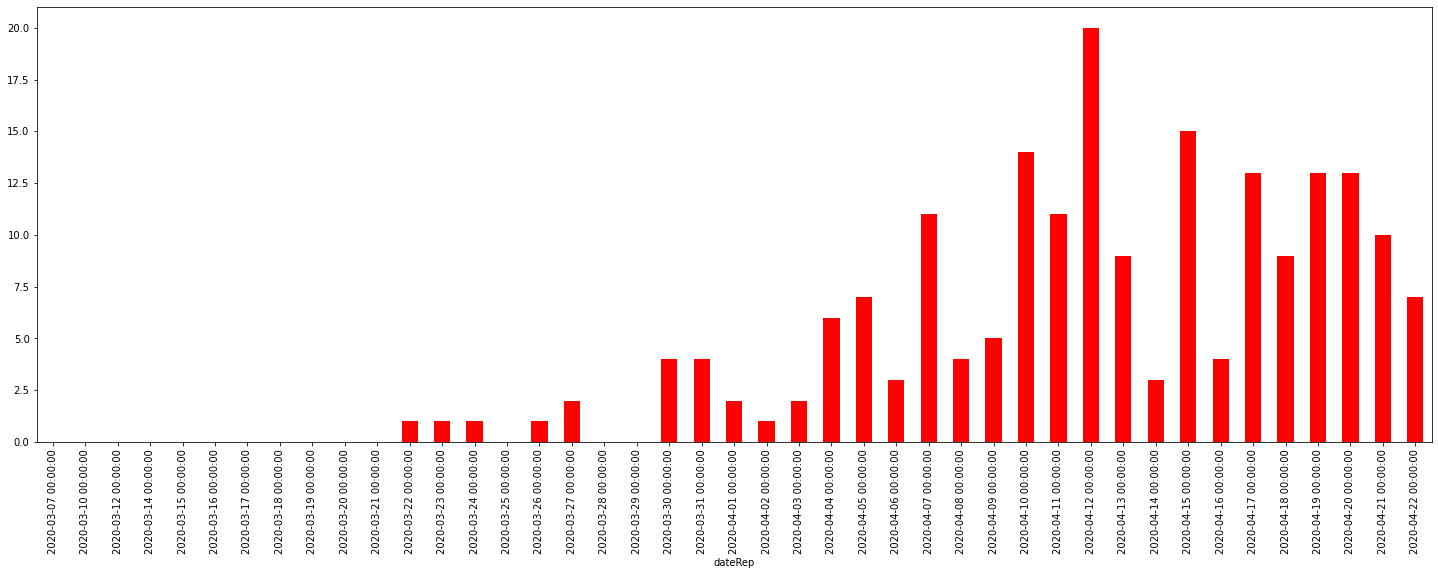

In [372]:
# Polombia
plt.figure(figsize=(25, 8))
ColXdeaths.plot.bar(color="red")

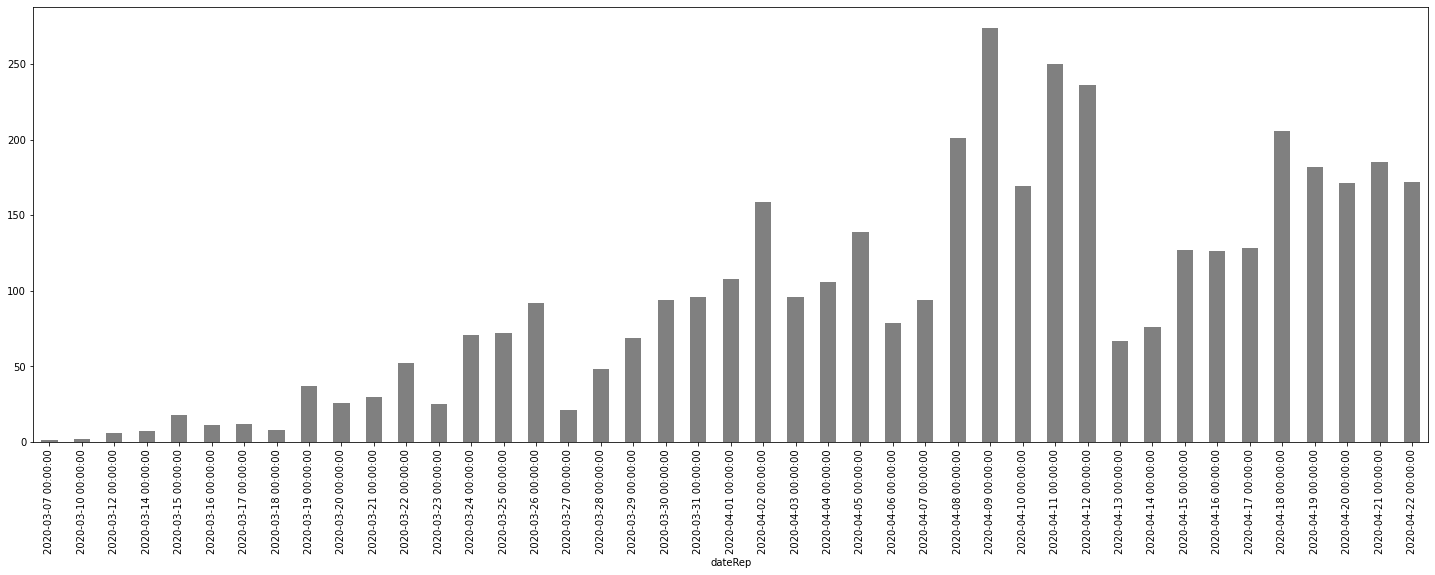

In [373]:
plt.figure(figsize=(25, 8))
ColXcases.plot.bar(color="grey")

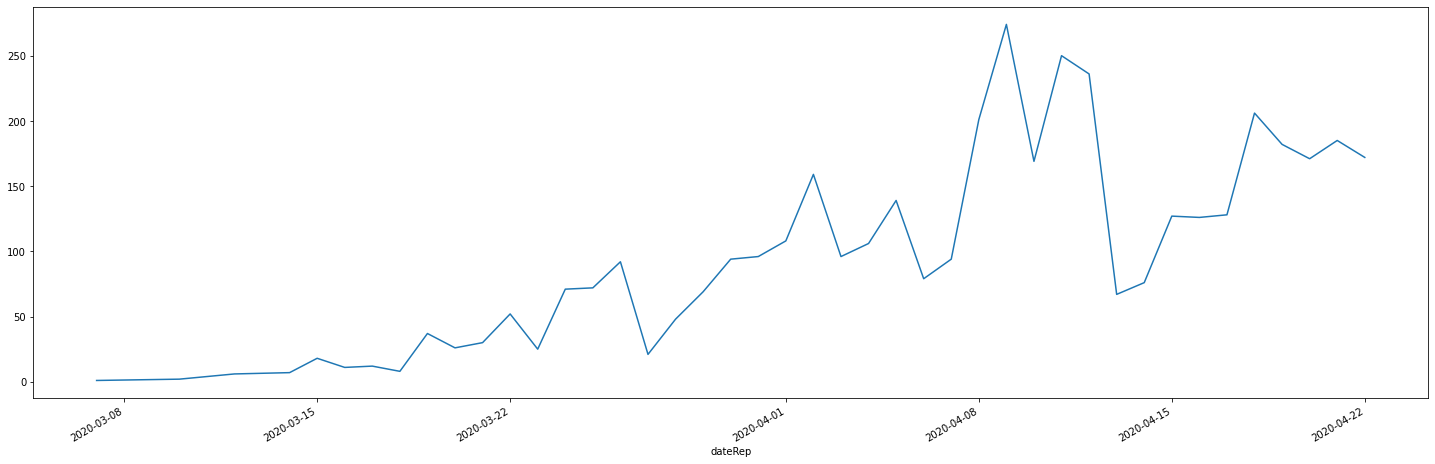

In [374]:
plt.figure(figsize=(25, 8))
ColXcases.plot()

In [0]:
# Descomposicion
# descomposicion = sm.tsa.seasonal_decompose(countryXdeaths, model="additive")
# descomposicion.plot()